In [1]:
#meta: 9/22/2019 Ex1.  Linear regression.  
# Univariate linear regression - predict profits for a food truck.  
# src Coursera, Standford ML course - refactor in python
# src for markup https://github.com/dibgerge/ml-coursera-python-assignments/blob/master/Exercise1/exercise1.ipynb


#see ex1.pdf
#Numbering per original assignments

#here: 10/10/2019
#      EDA plot training data
#      Define Cost function J
#      Define Gradient Descent function
#      Fit parameters theta to X,y data
#      Result: linear model with one variable
#      Plot linear regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 2. Linear regression with one variable
Implement linear regression with one variable to predict profits for a food truck.

## Predict Profits for a Food Truck
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

Dataset:  
*x* - population size in 10,000s  
*y* - profit in $10,000s

Use this data to help you select which city to expand to next.

## 2.0 Load Data
package: pandas

In [3]:
df = pd.read_csv('data/ex1/ex1data1.txt', header=None)
df.info()
df.columns = ['city_population', 'profit']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
0    97 non-null float64
1    97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [4]:
df.head()

,city_population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 2.1 Plotting the data
Package: matplotlib  
EDA.  Use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

Number of data points: 97


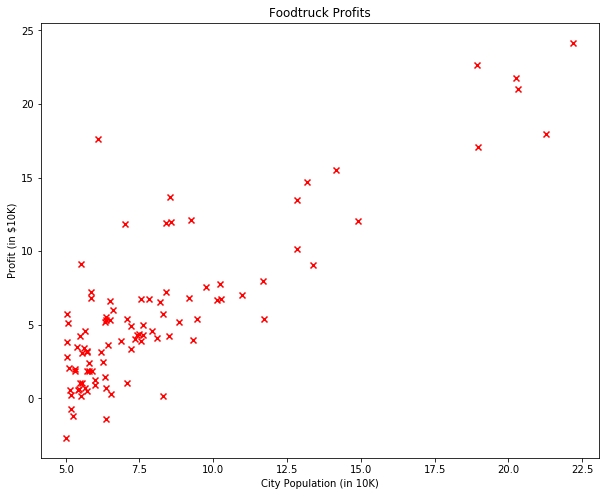

In [5]:
X=df['city_population']
y=df['profit']

#m - number of training examples
m=len(df)
print ("Number of data points: {}".format(m))

plt.figure(figsize=(10,8))
plt.title('Foodtruck Profits')
plt.scatter(X,y, marker = 'x', c='r')
plt.xlabel('City Population (in 10K)')
plt.ylabel ('Profit (in $10K)')
plt.show()

## 2.2  Gradient Descent
Objective: fit the linear regression parameters $\theta$  to our dataset using gradient descent.

### 2.2.1 Update Equations

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Recall that the parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

<div class="alert alert-block alert-info">
**Implementation Note:**  
We store each example as a row in the the $X$ matrix in Python `numpy`.  
To take into account the intercept term $\theta_0$, we add an additional first column to $X$ and set it to all ones. This allows us to treat $\theta_0$ as simply another 'feature'.
</div>

### 2.2.2 Implementation
We have already set up the data for linear regression.  
In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term.  
We also initialize the initial parameters to 0 and the learning rate alpha to 0.01.

<div class="alert alert-success">
myNote:  
*X* (matrix)  - input features  
*y* (vector)  - output variable  
$\theta$ (vector) - parameters  
<br>
dim:  
*n* - rows, here # of features  
*m* - columns, here # of training examples
</div>

In [6]:
# Add a column of ones to X
print("X features: X_0 = 1 (bias var), X_1 = city populations")
X = np.array([np.ones(m), df.loc[:,'city_population']])
print('X shape: ', X.shape)

# Number of features, number of records
n = X.shape[0]
print('# of features: ', n)
print('# of records: ', m)

# Define y 
y=np.array([df.loc[:,'profit']])
print('y shape: ', y.shape)

X features: X_0 = 1 (bias var), X_1 = city populations
X shape:  (2, 97)
# of features:  2
# of records:  97
y shape:  (1, 97)


In [7]:
#initialize fitting parameters
#np.array([[0],[0]])
theta = np.zeros((n, 1))
print('θ shape: ', theta.shape)
print('θ: \n',theta)

#initialize gradient descent settings
iterations = 1500
alpha = 0.01


θ shape:  (2, 1)
θ: 
 [[0.]
 [0.]]


### 2.2.3 Computing the cost $J(\theta)$
As you perform gradient descent to learn minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate $J(\theta)$ so you can check the convergence of your gradient descent implementation. 

Remember that the variables $X$ and $y$ are not scalar values. $X$ is a matrix whose rows represent the examples from the training set and $y$ is a vector whose each elemennt represent the value at a given row of $X$.

<div class="alert alert-success">
myNote:  
X          matrix  (2,97)  
theta      vector  (2,1)   
<br>
Matrix multiplication:  
y_hat = theta.T $*$ X => (1,2) x (2,97) = (1,97)
</div>

In [8]:
def computeCost(X,y,theta):
    """ function ComputeCost
    
    Objective
    =========
    Compute cost for linear regression 
    using theta as the parameter for linear regression 
    to fit the data points in X and y
        
    Paremeters
    =========
    input  X - matrix shape (n+1, m)
    output y - shape (1, m)
    params theta - vector shape (n+1, )
    
    Returns
    =========
    cost function J, type float

    Notes
    ========= 
    y_hat = theta.T * X => (1, n+1) x (n+1, m) => shape (1, m)     (same as y)

    to multiply: use np.dot(theta.T, X)
    refer: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
    """
    #initialize vars
    J=0
    m = y.shape[1] # number of training examples
    
    #compute hypothesis
    y_hat = np.dot( theta.T, X )
    #compute error
    error = y_hat - y
    error_sqrd = error**2
    #compute cost     
    J = error_sqrd.sum() / (2*m)
    
    return J

#### Test the cost function
Run computeCost using $\theta$ initialized to zeros.  

In [9]:
# Use and validate function
print(computeCost(X,y,theta))

#additional check, should see (approx) 54.24
theta2 = np.array([[-1], [2]])
print(computeCost(X,y,theta2))

32.072733877455676
54.24245508201238


<div class="alert alert-block alert-warning">
Peek at the answer:  
With $\theta$ = [0 ; 0] expected cost value (approx) 32.07  
With $\theta$ = [-1 ; 2] expected cost value (approx) 54.24
</div>

### 2.2.4 Gradient descent
As you program, make sure you understand what you are trying to optimize and what is being updated. Keep in mind that the cost $J(\theta)$ is parameterized by the vector $\theta$, not $X$ and $y$. That is, we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$, not by changing $X$ or $y$. 

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. Assuming you have implemented gradient descent and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.


<div class="alert alert-success">
myNote:  
X matrix        (2,97)  
y               (1,97)  
theta vector    (2,1)   
<br>
Matrix multiplication:  
y_hat = theta.T $*$ X => (1,2) x (2,97) = (1,97)   (same as y)  
error = y_hat - y => (1,97)                      (same as y)  
gradient = X $*$ (error/m).T  => (2,97) x (97,1) => vecor (2,1) (same as theta)
</div>

In [21]:
def gradientDescent(X,y,theta, alpha, num_iters):
    """ function ComputeCost
    
    Objective
    =========
    Fit the linear regression parameters θ to our dataset
    Minimize the value of J(θ) by changing the values of the vector θ (not by changing X or y)
        
    Paremeters
    =========
    input  X - matrix shape (n+1, m)
    output y - shape (1, m)
    params theta - vector shape (n+1, )
    alpha - learning rate 
    num_iters - number of iterations
    
    Returns
    =========
    updated theta
    J history

    Notes
    ========= 
    y_hat = theta.T * X => (1, n+1) x (n+1, m) => shape (1, m)     (same as y)
    error = y_hat - y   =>                        shape (1, m)     (same as y)
    gradient = vector                             shape (n+1, )    (same as theta)
    X * (error/m).T => (n+1, m) x (m, 1) =>       shape  n+1, ) 

    to multiply: use np.dot(theta.T, X)
    refer: https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
    """

    #Initialize vars
    m = X.shape[1]; # number of training examples
    J_history = np.zeros(num_iters)
    
    #Compute theta
    for i in np.arange(0, num_iters):
        #compute hypothesis
        y_hat = np.dot(theta.T, X)
        #compute error
        error = y_hat - y
        
        #calculate gradient - see my notes        
        gradient = np.dot(X, (error/m).T)
        theta_temp = theta - alpha * gradient
        theta = theta_temp
        
        #Save the cost J in every iteration    
        J_history[i] = computeCost(X, y, theta)
        
        #preview
        i_preview = 3
        if (i < i_preview) or (i > (iterations - i_preview)):
            print ("i: {}, \ngradient: {}, \nupdated theta: {}, \nupdated cost: {}\n".format(i, gradient, theta_temp, J_history[i]))
        
    return theta, J_history


#### Run gradient descent

In [22]:
theta = np.zeros((n, 1))
print("initial theta: {}\n".format(theta))
print("updated theta and J history")
theta, history = gradientDescent(X, y, theta, alpha, iterations)

initial theta: [[0.]
 [0.]]

updated theta and J history
i: 0, 
gradient: [[ -5.83913505]
 [-65.32884975]], 
updated theta: [[0.05839135]
 [0.6532885 ]], 
updated cost: 6.737190464870008

i: 1, 
gradient: [[ -0.45004022]
 [-11.67212851]], 
updated theta: [[0.06289175]
 [0.77000978]], 
updated cost: 5.9315935686049555

i: 2, 
gradient: [[ 0.50688252]
 [-2.13383331]], 
updated theta: [[0.05782293]
 [0.79134812]], 
updated cost: 5.901154707081388

i: 1498, 
gradient: [[ 0.04803002]
 [-0.00482514]], 
updated theta: [[-3.62981201]
 [ 1.16631419]], 
updated cost: 4.483411453374869

i: 1499, 
gradient: [[ 0.04794344]
 [-0.00481644]], 
updated theta: [[-3.63029144]
 [ 1.16636235]], 
updated cost: 4.483388256587726



In [12]:
print('Theta found by gradient descent:\n', theta)

Theta found by gradient descent:
 [[-3.63029144]
 [ 1.16636235]]


<div class="alert alert-block alert-warning">
Peek at the answer:  
Expected theta values (approx) '-3.6303, 1.1664 '
</div>

#### Predict
Your final values for θ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.  Use matrix multiplication, rather than explicit summation or looping, to calculate the predictions. This is an example of code vectorization.  

In [13]:
predict1 = np.dot([1, 3.5], theta)
print(predict1)
predict2 = np.dot([1, 7], theta)
print(predict2)

[0.45197679]
[4.53424501]


## 2.3 Communicate Results
### Plot the linear fit
Hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

In [20]:
print("Linear model after finding thetas: ")
print ("y_hat = {:.2f} + {:.2f} * x_1".format( theta[0][0], theta[1][0]))

Linear model after finding thetas: 
y_hat = -3.63 + 1.17 * x_1


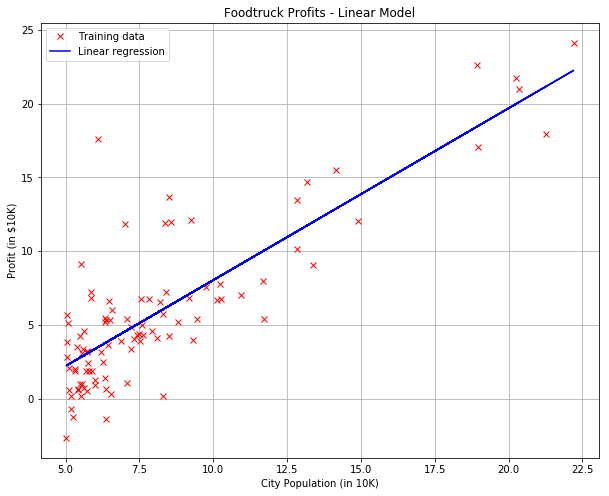

In [18]:
#visualize
plt.figure(figsize=(10,8))
plt.title('Foodtruck Profits - Linear Model')

plt.plot(X[1,:],y[0], 'rx', label = 'Training data')
plt.plot(X[1,:],np.dot(X.T, theta), 'b-', label = 'Linear regression')

plt.xlabel('City Population (in 10K)')
plt.ylabel ('Profit (in $10K)')
plt.grid(True)
plt.legend()
plt.show()

### Congratulations! You now understand univariate linear regression.